In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

**Import Data**

In [ ]:
df=pd.read_csv('fintech_user_churn.csv')

**Exploratory Data Analysis**

In [ ]:
print(df.shape)
df.nunique()

(1000, 10)


,0
user_id,1000
months_active,60
monthly_spending,960
total_transaction_amt,998
preferred_channel,2
membership_type,3
preferred_payment_type,3
app_security_enabled,2
in_app_support_use,2
user_churn,2


In [ ]:
df.head()

,user_id,months_active,monthly_spending,total_transaction_amt,preferred_channel,membership_type,preferred_payment_type,app_security_enabled,in_app_support_use,user_churn
0,U00001,18,115.33,1322.68,mobile,premium,simple_pay,no,yes,0
1,U00002,47,73.62,1503.64,mobile,free,card,no,yes,0
2,U00003,2,64.37,4113.18,mobile,standard,card,yes,yes,0
3,U00004,29,32.58,4051.91,web,free,simple_pay,no,no,0
4,U00005,13,78.17,2126.38,mobile,premium,auto_transfer,yes,no,1


In [ ]:
df.describe()

,months_active,monthly_spending,total_transaction_amt,user_churn
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.076000,79.557520,2419.084460,0.237000
std,17.390764,29.456133,1243.345144,0.425455
min,1.000000,-18.250000,-1798.480000,0.000000
25%,15.000000,59.932500,1605.662500,0.000000
50%,29.000000,78.165000,2454.845000,0.000000
75%,45.000000,99.085000,3244.120000,0.000000
max,60.000000,170.440000,6388.170000,1.000000


In [ ]:
df.isna().sum()

,0
user_id,0
months_active,0
monthly_spending,0
total_transaction_amt,0
preferred_channel,0
membership_type,0
preferred_payment_type,0
app_security_enabled,0
in_app_support_use,0
user_churn,0


**Churn Rate and Class Imbalance Analysis**

user_churn
0    0.763
1    0.237
Name: proportion, dtype: float64


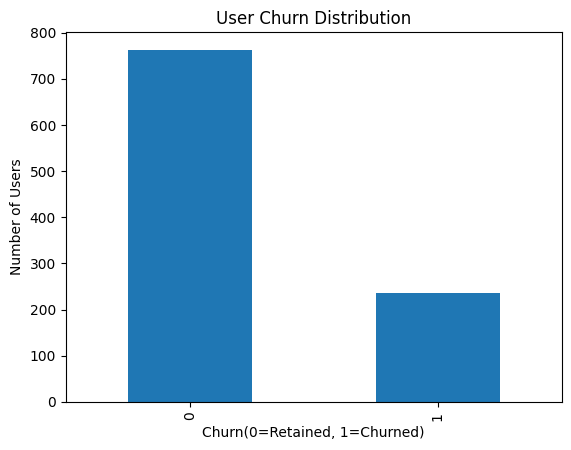

In [ ]:
churn_rate=df['user_churn'].value_counts(normalize=True)
print(churn_rate)

df['user_churn'].value_counts().plot(kind='bar')
plt.title('User Churn Distribution')
plt.xlabel('Churn(0=Retained, 1=Churned)')
plt.ylabel('Number of Users')
plt.show()

**Comparison of Key Numerical Features Between Churned and Retained Users**

Monthly Spending

/tmp/ipython-input-1733312260.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['user_churn']==0]['monthly_spending'],


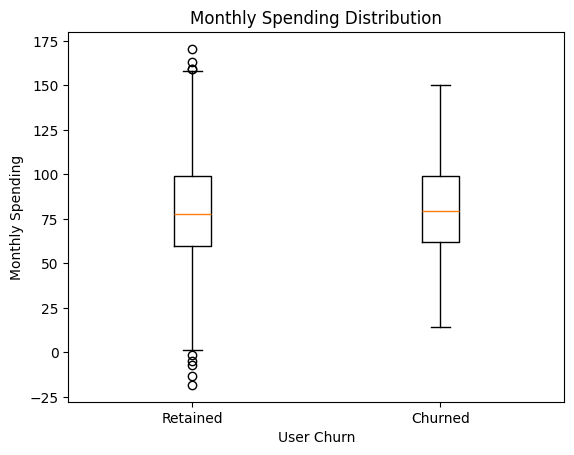

In [ ]:
plt.boxplot([df[df['user_churn']==0]['monthly_spending'],
             df[df['user_churn']==1]['monthly_spending']],
            labels=['Retained', 'Churned'])
plt.title('Monthly Spending Distribution')
plt.xlabel('User Churn')
plt.ylabel('Monthly Spending')
plt.show()

Months Active

/tmp/ipython-input-2628010204.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


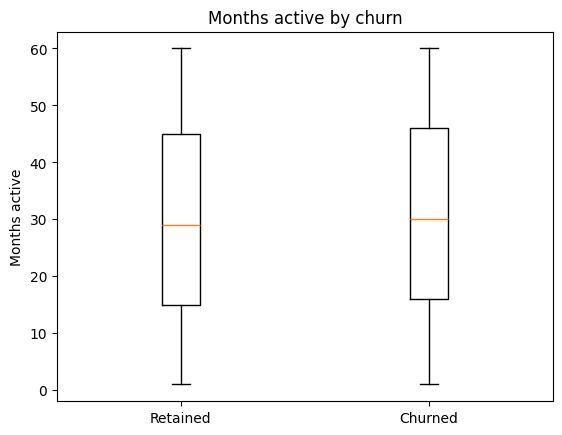

In [ ]:
plt.boxplot(
    [df[df['user_churn']==0]['months_active'],
     df[df['user_churn']==1]['months_active']],
    labels=['Retained', 'Churned'],
    showfliers=False
)
plt.title('Months active by churn')
plt.ylabel('Months active')
plt.show()


Total_transaction_amount

/tmp/ipython-input-2254929273.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


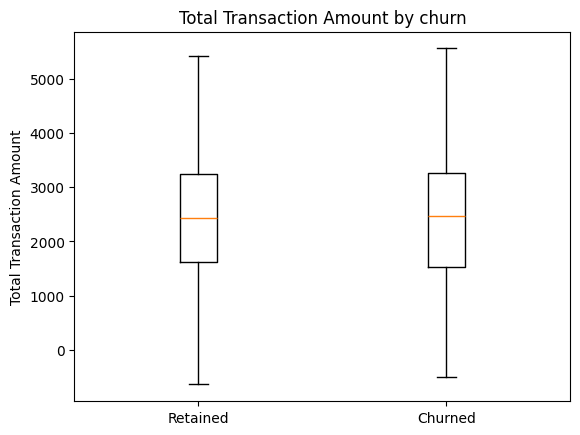

In [ ]:
plt.boxplot(
    [df[df['user_churn']==0]['total_transaction_amt'],
    df[df['user_churn']==1]['total_transaction_amt']],
    labels=['Retained', 'Churned'],

    showfliers=False
    )
plt.title('Total Transaction Amount by churn')
plt.ylabel('Total Transaction Amount')
plt.show()



**Churn Rate Analysis by Categorical Features**

Membership Type

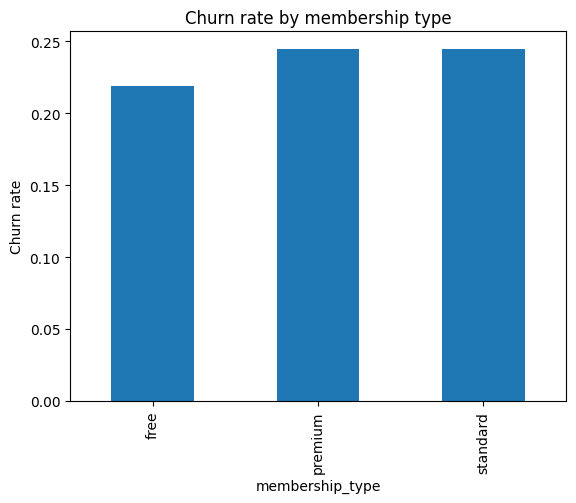

In [ ]:
churn_by_membership = df.groupby('membership_type')['user_churn'].mean()

churn_by_membership.plot(kind='bar')
plt.title('Churn rate by membership type')
plt.ylabel('Churn rate')
plt.show()

Preferred Payment Method

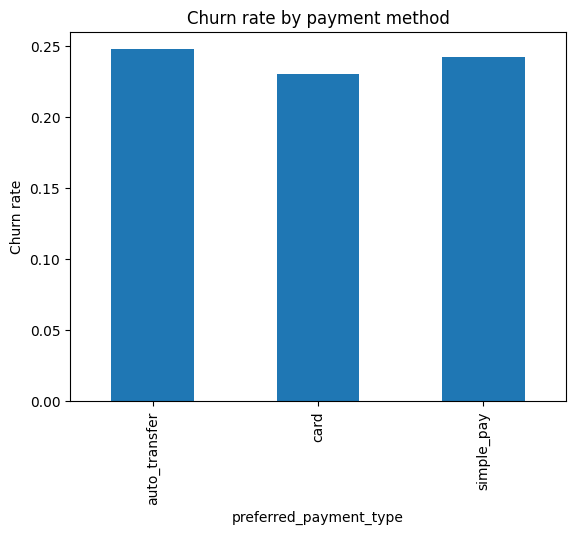

In [ ]:
Churn_by_preferred_payment_method=df.groupby('preferred_payment_type')['user_churn'].mean()

Churn_by_preferred_payment_method.plot(kind='bar')
plt.title('Churn rate by payment method')
plt.ylabel('Churn rate')
plt.show()

preferred_channel

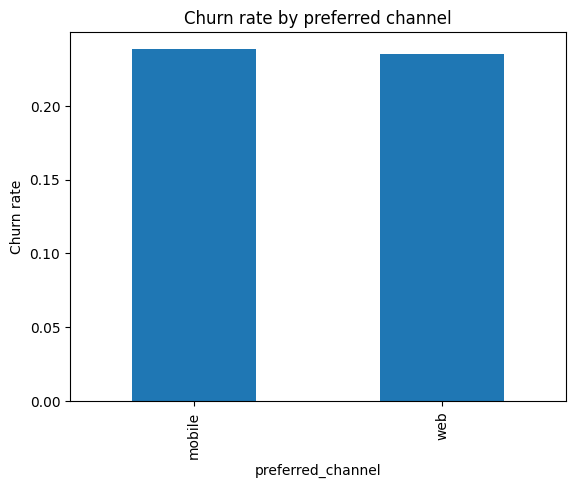

In [ ]:
Churn_by_preferred_channel=df.groupby('preferred_channel')['user_churn'].mean()

Churn_by_preferred_channel.plot(kind='bar')
plt.title('Churn rate by preferred channel')
plt.ylabel('Churn rate')
plt.show()

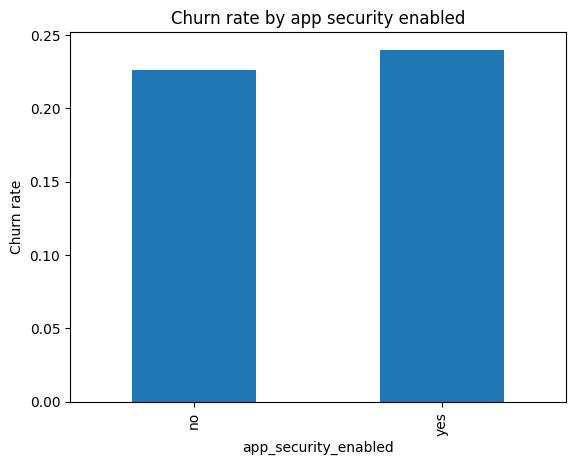

In [ ]:
Churn_by_app_security_enabled=df.groupby('app_security_enabled')['user_churn'].mean()

Churn_by_app_security_enabled.plot(kind='bar')
plt.title('Churn rate by app security enabled')
plt.ylabel('Churn rate')
plt.show()

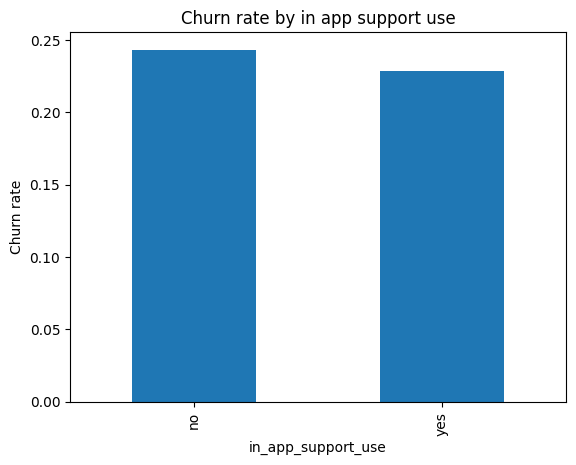

In [ ]:
Churn_by_in_app_support_use	=df.groupby('in_app_support_use')['user_churn'].mean()

Churn_by_in_app_support_use.plot(kind='bar')
plt.title('Churn rate by in app support use')
plt.ylabel('Churn rate')
plt.show()

**Data Preprocessing**

Remove Irrelevant Columns

In [ ]:
df_prep = df.copy()

if 'user_id' in df_prep.columns:
    df_prep.drop(columns=['user_id'], inplace=True)


Split Features (X) and Target (y)

In [ ]:
y = df_prep['user_churn']
X = df_prep.drop(columns=['user_churn'])

Encode Categorical Variables

In [ ]:
categorical_cols = [
    'preferred_channel',
    'membership_type',
    'preferred_payment_type',
    'app_security_enabled',
    'in_app_support_use'
]

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

Scale Numerical Features

In [ ]:
numeric_cols = [
    'months_active',
    'monthly_spending',
    'total_transaction_amt'
]

scaler = StandardScaler()
# scaler = MinMaxScaler()  # optional alternative

X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X.head()


X shape: (1000, 10)
y shape: (1000,)


,months_active,monthly_spending,total_transaction_amt,preferred_channel_web,membership_type_premium,membership_type_standard,preferred_payment_type_card,preferred_payment_type_simple_pay,app_security_enabled_yes,in_app_support_use_yes
0,-0.694739,1.215040,-0.882260,False,True,False,False,True,False,True
1,0.973647,-0.201672,-0.736644,False,False,False,True,False,False,True
2,-1.615228,-0.515856,1.363212,False,False,True,True,False,True,True
3,-0.061903,-1.595628,1.313909,True,False,False,False,True,False,False
4,-0.982392,-0.047128,-0.235535,False,True,False,False,False,True,False


Train–Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**Modeling**

Model 1: Logistic Regression

In [ ]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]


Model 2: Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


Classification Metrics

In [ ]:
print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.71      0.45      0.55       153
           1       0.18      0.40      0.25        47

    accuracy                           0.44       200
   macro avg       0.45      0.43      0.40       200
weighted avg       0.59      0.44      0.48       200

Random Forest Performance
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       153
           1       0.00      0.00      0.00        47

    accuracy                           0.73       200
   macro avg       0.38      0.48      0.42       200
weighted avg       0.58      0.73      0.65       200



Confusion Matrix Visualization

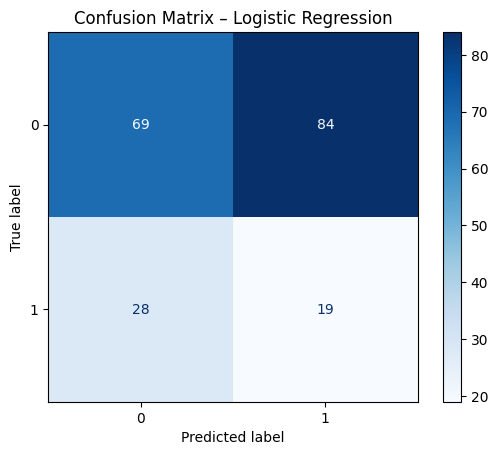

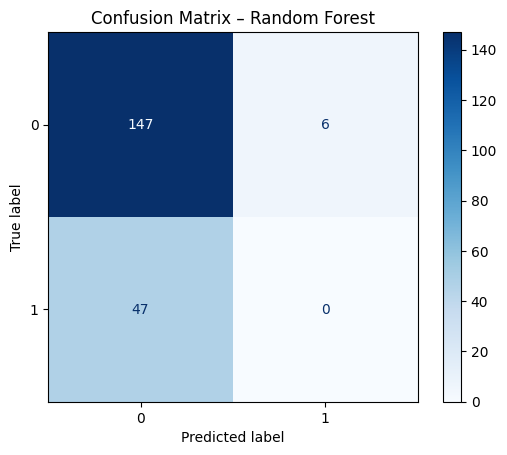

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr,
    cmap='Blues'
)
plt.title('Confusion Matrix – Logistic Regression')
plt.show()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    cmap='Blues'
)
plt.title('Confusion Matrix – Random Forest')
plt.show()

ROC Curve and AUC

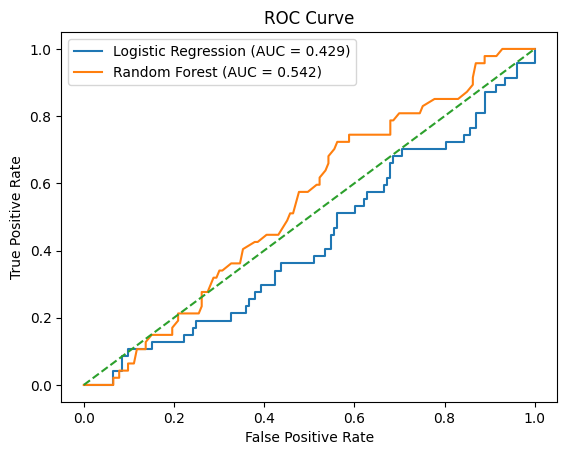

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**Feature Importance Analysis**



Logistic Regression — Coefficient Analysis

In [ ]:
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
})

coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

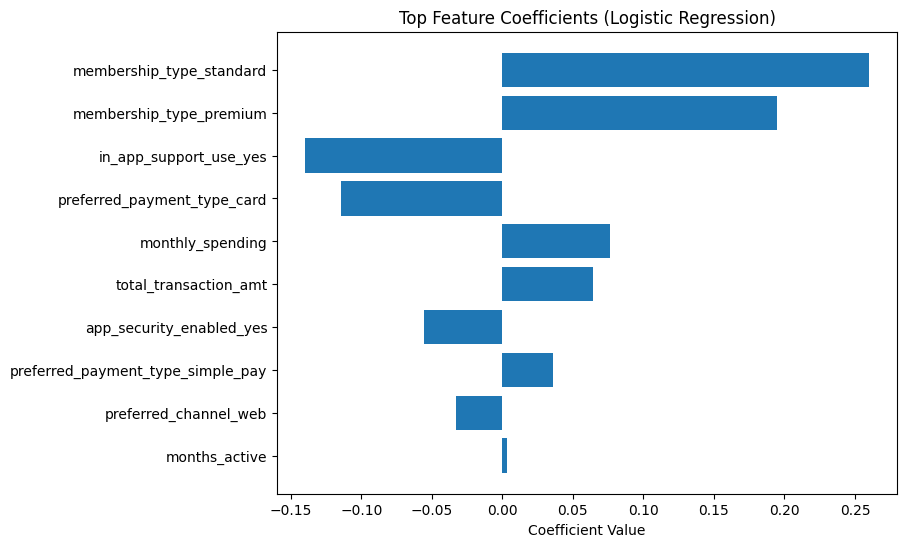

In [ ]:
top_n = 15
plt.figure(figsize=(8, 6))
plt.barh(
    coef_df.head(top_n)['feature'],
    coef_df.head(top_n)['coefficient']
)
plt.gca().invert_yaxis()
plt.title('Top Feature Coefficients (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.show()

Random Forest — Feature Importance

In [ ]:
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

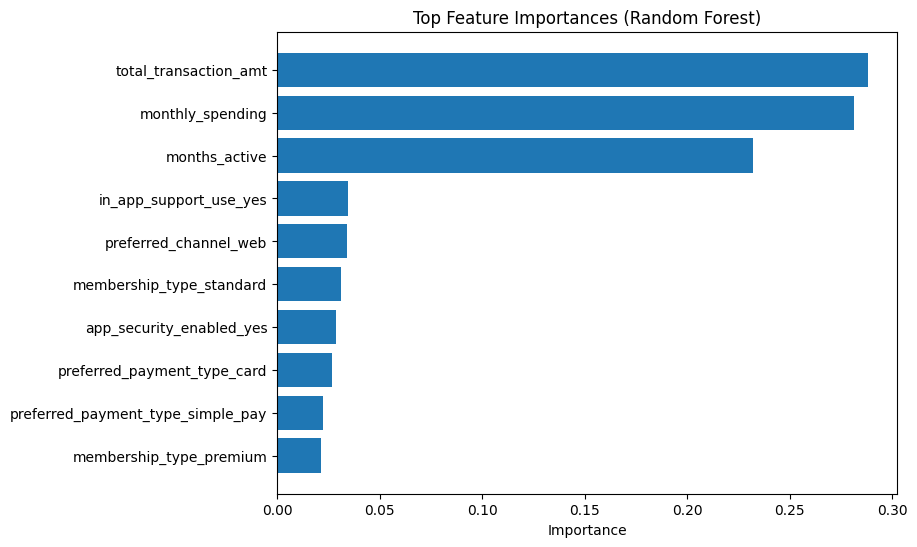

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(
    rf_importance.head(15)['feature'],
    rf_importance.head(15)['importance']
)
plt.gca().invert_yaxis()
plt.title('Top Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()


**Results**

**What are the important variables for predicting customer churn?**

Across the models used in this analysis, total transaction amount and monthly spending emerged as key predictors of customer churn, as they capture users’ cumulative transaction behaviour and spending patterns.

**Business implications: How can fintech apps reduce user churn**

- Focus on retaining high-value users through proactive engagement
- Strengthen user trust and support to improve long-term retention